Exercise 1:

1)
Throwing dice 4 times, one gets at least one 6

=> So the probabilities that no one gets at least one 6
it will be 5 * 5 * 5 * 5 = 5^4

The total case is 6^4:

The result will be: 1 - ((5 ^ 4) / (6 ^ 4)) = 0.518
2)

Two dices 24 times, one gets at least one pair of 6

1 - (35) ^ 24 / (36) ^ 24

**Question**

Calculate the probabilities

Test by simulation



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from numpy.random import randint

result1 = randint(1,7,4)

P1_none = 5 ** 4 / 6 ** 4
P1 = 1 - P1_none

P2_none = (35) ** 24 / 36 ** 24
P2 = 1 - P2_none
print("Exercise 1: Calculate the probabilites")
print(P1)
print(P2)

Exercise 1: Calculate the probabilites
0.5177469135802469
0.4914038761309033


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from numpy.random import randint

from re import T
N = 10000
case1 = 0
case2 = 0
for n in range(N):
  result = randint(1, 7, 4)
  result2 = randint(1, 7, (2, 24))
  ok = False
  for i in range(4):
    if(result[i] == 6):
      ok = True

  if(ok == True):
    case1 = case1 + 1
  ok = False
  for i in range(24):
    if result2[0][i] == 6 and result2[1][i] == 6:
      ok = True
  if(ok == True):
    case2 = case2 + 1

print("Exercise 1: Test by simulation")
print(case1 / N)
print(case2 / N)


Exercise 1: Test by simulation
0.5055
0.4865


Exercise 2: Calculate by simulation


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#%% simulation
K = 100000#simulation rounds
n = 100 #number of persons

ans = 0

for k in range(K):
  sp = np.random.randint(1, 366, n)
  check = np.zeros(367)
  for i in range(n):
    check[sp[i]] += 1
  res = 0
  for i in range(n):
    res = max(res, check[sp[i]])
  if(res >= 3):
    ans += 1

print(ans / K)


0.64622


Exercise 3: Calculate by simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

K = 100000

n = 10
t = 50

ans = 0
coupons = np.zeros(n + 1)
for k in range(K):
  check = np.zeros(n + 1)
  coupons = randint(1, n + 1, t)
  for i in range(t):
    check[coupons[i]] += 1
  ok = True
  for i in range(1, n + 1):
    if(check[i] == 0):
      ok = False
  if(ok == True):
    ans += 1

print(ans / K)

0.94948


Exercise 4

Calculate by simulation

Draw a picture


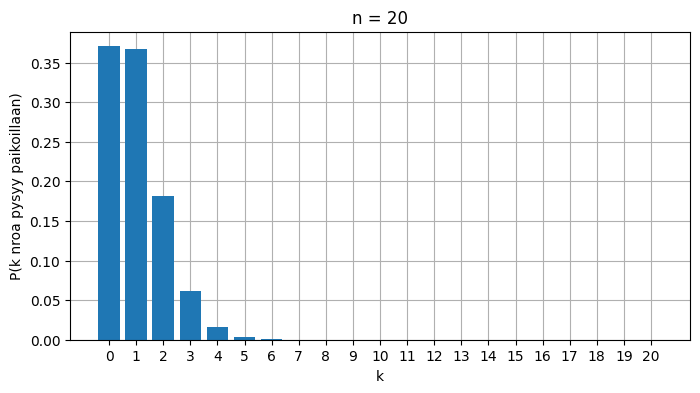

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import permutation

K = 100000
n = 20


res = np.zeros(n + 1)

original_order = np.arange(1, n + 1)

for test in range(K):
  sp = np.arange(1, n + 1)
  ans = 0
  new_order = permutation(original_order)
  for i in range(n):
    if(original_order[i] == new_order[i]):
        ans += 1
  res[ans] += 1

for i in range(n):
  res[i] = res[i] / K

x=np.arange(0,n+1)
plt.figure(figsize=(8,4))
plt.bar(x,res,zorder=2)
plt.grid()
plt.xticks(x)
plt.xlabel('k')
plt.ylabel('P(k nroa pysyy paikoillaan)')
plt.title('n = ' + str(n))
plt.show()



Exercise 5

Calculate the probability

Test by simulation

In [ ]:
from scipy.special import comb

m = 5
n = 7
# Choose m from m + n so we will have m+nCm
# Each of the turn, the traveller moves up or right. So it will be 2 ^ (m + n) case
P_total = 2 ** (m + n)

print(comb(m + n, n) / (P_total))

0.193359375


In [ ]:
from numpy.random import randint

K = 100000
m = 8
n = 5
ans = 0
for test in range(K):
  route = randint(0, 2, m + n)
  cnt = 0
  for i in range(m + n):
    if(route[i] == 0):
      cnt += 1
  if(cnt == m):
    ans += 1

print(ans / K)


0.15798


Exercise 6:

Calculate the probabilities

Test by simulation

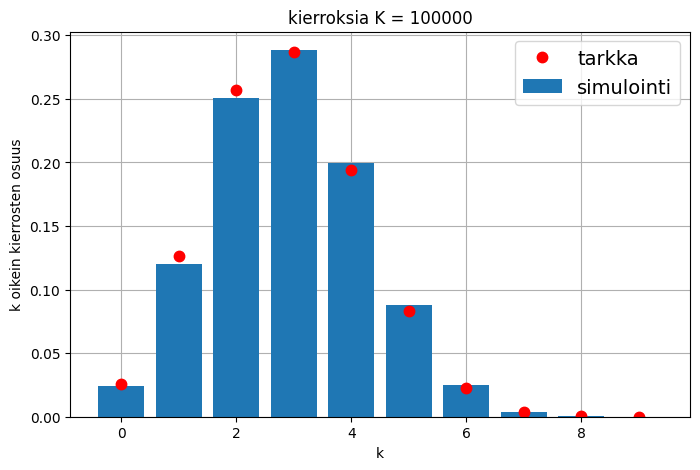

In [ ]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from numpy.random import permutation

K = 100000

choose_num = 10
win_num = 20
non_num = 50

ans = np.zeros(choose_num)
numbers=np.arange(1, win_num + non_num, 1)

winning_numbers = permutation(numbers)[:win_num]

for test in range(K):
  choose_numbers = permutation(numbers)[:choose_num]
  winning = np.intersect1d(choose_numbers,winning_numbers)
  k = winning.size
  ans[k] += 1


P_total = comb(win_num + non_num, choose_num)

p=np.zeros(choose_num) #p[k] = P(k winning numbers), k=0,1,2,...,7
#from scipy.special import comb
for k in range(choose_num):
  p[k] = comb(win_num, k) * comb(non_num, choose_num - k) / P_total


plt.figure(figsize = (8, 5))
x = np.arange(0, 10, 1)
plt.bar(x, ans / K, label = 'simulointi', zorder = 2)
plt.plot(x, p, 'r.',label = 'tarkka', markersize = 15)
plt.legend(fontsize=14)
plt.xlabel('k')
plt.ylabel('k oikein kierrosten osuus')
plt.title('kierroksia K = '+str(K))
plt.grid()
plt.show()

Exercise 7:

Calculate by simulation the probability


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import permutation

K = 100000

chosen_nums = 7
nums = 39

numbers = np.arange(1, nums, 1)

ans = 0

for test in range(K):
    chosen_numbers = permutation(numbers)[:chosen_nums]
    ok = True
    chosen_numbers.sort()
    for i in range(chosen_nums - 1):
      if chosen_numbers[i] + 1 == chosen_numbers[i + 1]:
        ok = False
    if ok == True:
      ans += 1

print(ans / K)





0.26807


Exercise 8:

Calculate by simulation the probabilities

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import permutation

K = 10000
ans = 0
ans_2 = 0
for test in range(K):
  s = permutation(52)
  np.random.shuffle(s)
  numbers=np.arange(1,14)
  numbers=np.hstack((numbers,numbers,numbers,numbers))
  suit=np.ones(13)
  suit=np.hstack((suit,2*suit,3*suit,4*suit))
  deck=np.zeros((52,2))
  deck[:,0]=numbers
  deck[:,1]=suit

  sdeck = deck[s,:]
  person1 = sdeck[:13]
  person2 = sdeck[13:26]
  person3 = sdeck[26:39]
  person4 = sdeck[39:52]
  ok1 = False
  ok2 = False
  ok3 = False
  ok4 = False
  for i in range(13):
    if(person1[i][0] == 1):
      ok1 = True
  for i in range(13):
    if(person2[i][0] == 1):
      ok2 = True
  for i in range(13):
    if(person3[i][0] == 1):
      ok3 = True
  for i in range(13):
    if(person4[i][0] == 1):
      ok4 = True
  if ok1 == True and ok2 == True and ok3 == True and ok4 == True:
    ans += 1

  if(len(np.unique(person1[:, 1])) == 4 and len(np.unique(person2[:, 1])) == 4 and len(np.unique(person3[:, 1])) == 4 and len(np.unique(person4[:, 1])) == 4):
    ans_2 += 1
print("P(each person gets one ace (= number 1))")
print(ans / K)
print("P(each person gets cards from each 4 suites)")
print(ans_2 / K)






P(each person gets one ace (= number 1))
0.1023
P(each person gets cards from each 4 suites)
0.8174


Exercise 9

Calculate probabilities

Test by simulation


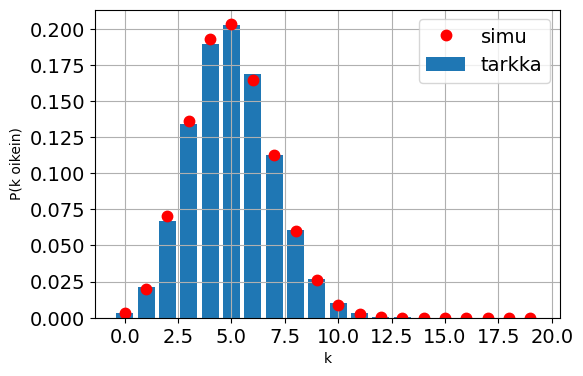

[3.17121194e-03 2.11414129e-02 6.69478076e-02 1.33895615e-01
 1.89685455e-01 2.02331152e-01 1.68609293e-01 1.12406195e-01
 6.08866892e-02 2.70607508e-02 9.92227528e-03 3.00675008e-03
 7.51687521e-04 1.54192312e-04 2.56987187e-05 3.42649582e-06
 3.56926648e-07 2.79942469e-08 1.55523594e-09 5.45696821e-11]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import permutation
from scipy.special import comb
from numpy.random import randint

K = 10000
questions = 20

# ((20) C k) * (3 ^ (20 - k))
# Ptotal = 4 ^ 20


P_total = 4 ** (questions)


p = np.zeros(questions) #p[k] = P(k winning numbers), k=0,1,2,...,7
#from scipy.special import comb
for k in range(questions):
  p[k] = comb(questions, k) * (3 ** (questions - k)) / P_total

res = np.zeros(questions)

for test in range(K):
  ans = 0
  for i in range(questions):
    x = randint(1, 5)
    y = randint(1, 5)
    if(x == y):
      ans += 1
  res[ans] += 1

x = np.arange(0, questions)
plt.figure(figsize = (6, 4))
plt.bar(x, p, label = 'tarkka', zorder = 1)
plt.plot(x, res / K, 'r.',label = 'simu', markersize = 15)
plt.grid()
plt.xlabel('k')
plt.ylabel('P(k oikein)')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)
plt.show()
print(p)


Exercise 10:

Calculate by simulation

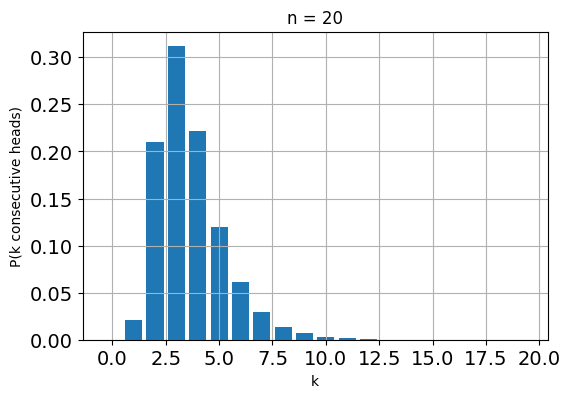

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

K = 100000
n = 20

graph = np.zeros(n)
for test in range(K):
  ans = 0
  res = 0
  temp = 0
  for i in range(20):
    coin = randint(1, 3)
    if(temp == coin):
      res = res + 1
      ans = max(res, ans)
    else:
      res = 0
    temp = coin
  graph[ans] += 1


x = np.arange(0, n)
plt.figure(figsize = (6, 4))
plt.bar(x, graph / K, zorder = 1)
plt.grid()
plt.xlabel('k')
plt.ylabel('P(k consecutive heads)')
plt.title('n = ' + str(n))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Exercise 11:
Binomial Distribution

Calculate

Check by the simulation


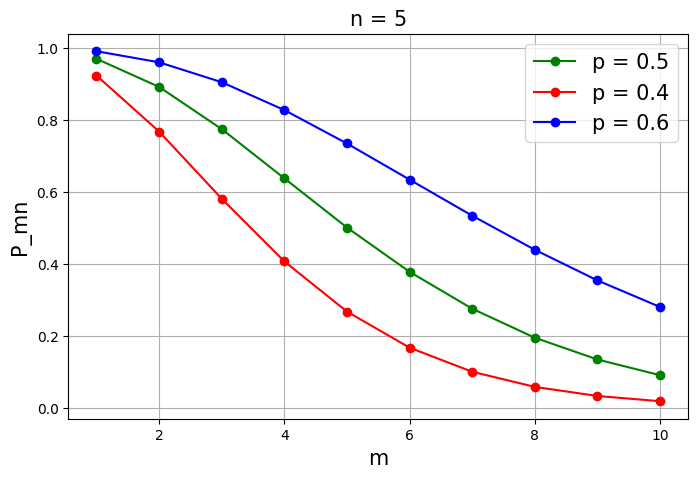

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from scipy.special import comb

n = 5

res = np.zeros(10)
ans = 0
p = 0.4

for m in range(1, 11):
  ans = 0
  for r in range(m, m + n, 1):
    ans = ans + comb(m + n - 1, r) * (p ** r) * ((1 - p) ** (m + n - 1 - r))
  res[m - 1] = ans

res_1 = np.zeros(10)
ans = 0
p = 0.5

for m in range(1, 11):
  ans = 0
  for r in range(m, m + n, 1):
    ans = ans + comb(m + n - 1, r) * (p ** r) * ((1 - p) ** (m + n - 1 - r))
  res_1[m - 1] = ans

res_2 = np.zeros(10)
ans = 0
p = 0.6

for m in range(1, 11):
  ans = 0
  for r in range(m, m + n, 1):
    ans = ans + comb(m + n - 1, r) * (p ** r) * ((1 - p) ** (m + n - 1 - r))
  res_2[m - 1] = ans

x = np.arange(1, 11, 1)
plt.figure(figsize = (8,5))
plt.plot(x, res_1, 'g.-', label = 'p = 0.5' ,markersize = 12)
plt.plot(x, res, 'r.-', label = 'p = 0.4',markersize = 12)
plt.plot(x, res_2, 'b.-', label = 'p = 0.6' ,markersize = 12)
plt.grid()
plt.xlabel('m', fontsize = 15)
plt.ylabel('P_mn', fontsize = 15)
plt.legend(fontsize = 15)
plt.title('n = '+str(n), fontsize = 15)
plt.show()


Exercise 12:
Calculate by simulation


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from scipy.special import comb

K = 100000
ans = 0
lose = 0
for test in range(K):
  sum = 0
  x = randint(1, 7, 1)
  y = randint(1, 7, 1)
  sum = x + y
  if(sum == 7 or sum == 11):
    ans += 1
  elif(sum == 2 or sum == 3 or sum == 12):
    lose += 1
  else:
    res = 0
    while(res != sum and res != 7):
      x = randint(1, 7, 1)
      y = randint(1, 7, 1)
      res = x + y
    if(res == sum):
      ans += 1
print(ans / K)

0.49456


Exercise 13:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from scipy.special import comb

K = 10000
ans = 0

for test in range(K):
  x = randint(1, 60, 1)
  y = randint(1, 60, 1)
  if(x > y - 10 and x < y + 10):
    ans += 1
print(ans / K)

0.2948


Exercise 14:


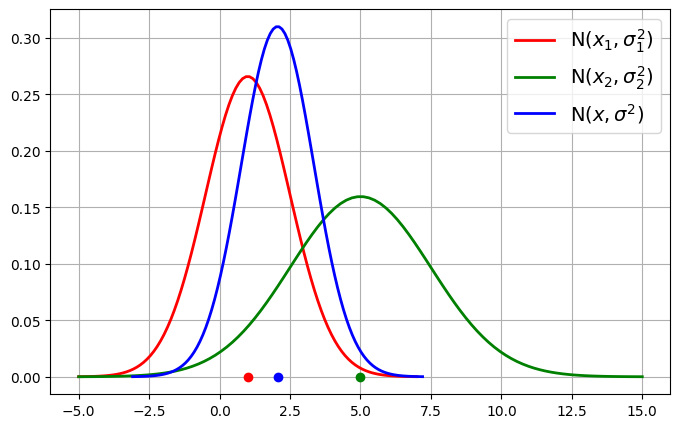

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from scipy.special import comb

#GIVEN
x1 = 1
sigma1 = 1.5
x2 = 5
sigma2 = 2.5


# Solve

t = sigma1 ** 2 + sigma2 ** 2
a1 = sigma2 * sigma2 / t
a2 = sigma1 * sigma1 / t
x = a1 * x1 + a2 * x2

sigma = np.sqrt(sigma1 ** 2 * sigma2 ** 2 / t)

u=np.linspace(x1-4*sigma1,x1+4*sigma1,100)
f=1/(np.sqrt(2*np.pi)*sigma1)*np.exp(-1/2*((u-x1)/sigma1)**2)


u1=np.linspace(x2-4*sigma2,x2+4*sigma2,100)
f1=1/(np.sqrt(2*np.pi)*sigma2)*np.exp(-1/2*((u1-x2)/sigma2)**2)

u2=np.linspace(x-4*sigma,x+4*sigma,100)
f2=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1/2*((u2-x)/sigma)**2)


plt.figure(figsize=(8,5))
plt.plot(u, f, 'r', label ='N($x_1, \sigma_1^2$)', linewidth = 2)
plt.plot(x1,0,'ro')

plt.plot(u1, f1, 'g', label ='N($x_2, \sigma_2^2$)', linewidth = 2)
plt.plot(x2,0,'go')

plt.plot(u2, f2, 'b', label ='N($x, \sigma^2$)', linewidth = 2)
plt.plot(x,0,'bo')


plt.grid()
plt.legend(fontsize = 14)
#plt.title('x_1 = '+str(x1)+', $\sigma_1$ = '+str(sigma1), 'x_2 = '+str(x2)+', $\sigma_2$ = '+str(sigma2),
#          fontsize=14)
plt.legend(fontsize=14)
plt.show()

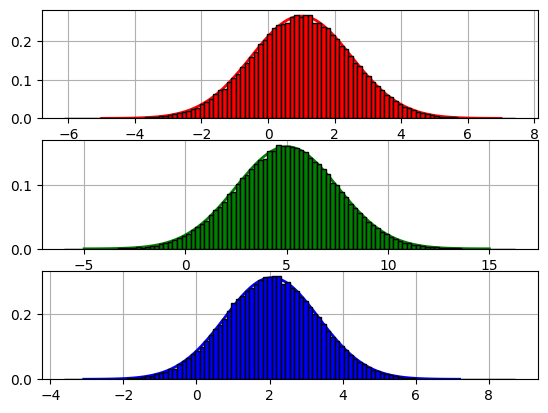

In [ ]:
n=100000
plt.subplot(311)
X=np.random.normal(x1, sigma1,n) #n  N(mu,sigma^2)-distributed numbers

plt.plot(u, f, 'r', label ='N($x_1, \sigma_1^2$)', linewidth = 2)
plt.plot(x1,0,'ro')
plt.hist(X,bins=100,density=True,edgecolor='k',zorder=2, facecolor = 'r')

plt.grid()

plt.subplot(312)
n=100000
X=np.random.normal(x2, sigma2,n) #n  N(mu,sigma^2)-distributed numbers

plt.plot(u1, f1, 'g', label ='N($x_1, \sigma_1^2$)', linewidth = 2)
plt.plot(x2,0,'go')
plt.hist(X,bins=100,density=True,edgecolor='k',zorder=2, facecolor = 'g')

plt.grid()

plt.subplot(313)
n=100000
X=np.random.normal(x, sigma,n) #n  N(mu,sigma^2)-distributed numbers

plt.plot(u2, f2, 'b', label ='N($x_1, \sigma_1^2$)', linewidth = 2)
plt.plot(x,0,'ro')
plt.hist(X,bins=100,density=True,edgecolor='k',zorder=2, facecolor = 'b')

plt.grid()
plt.show()


Exercise 15:

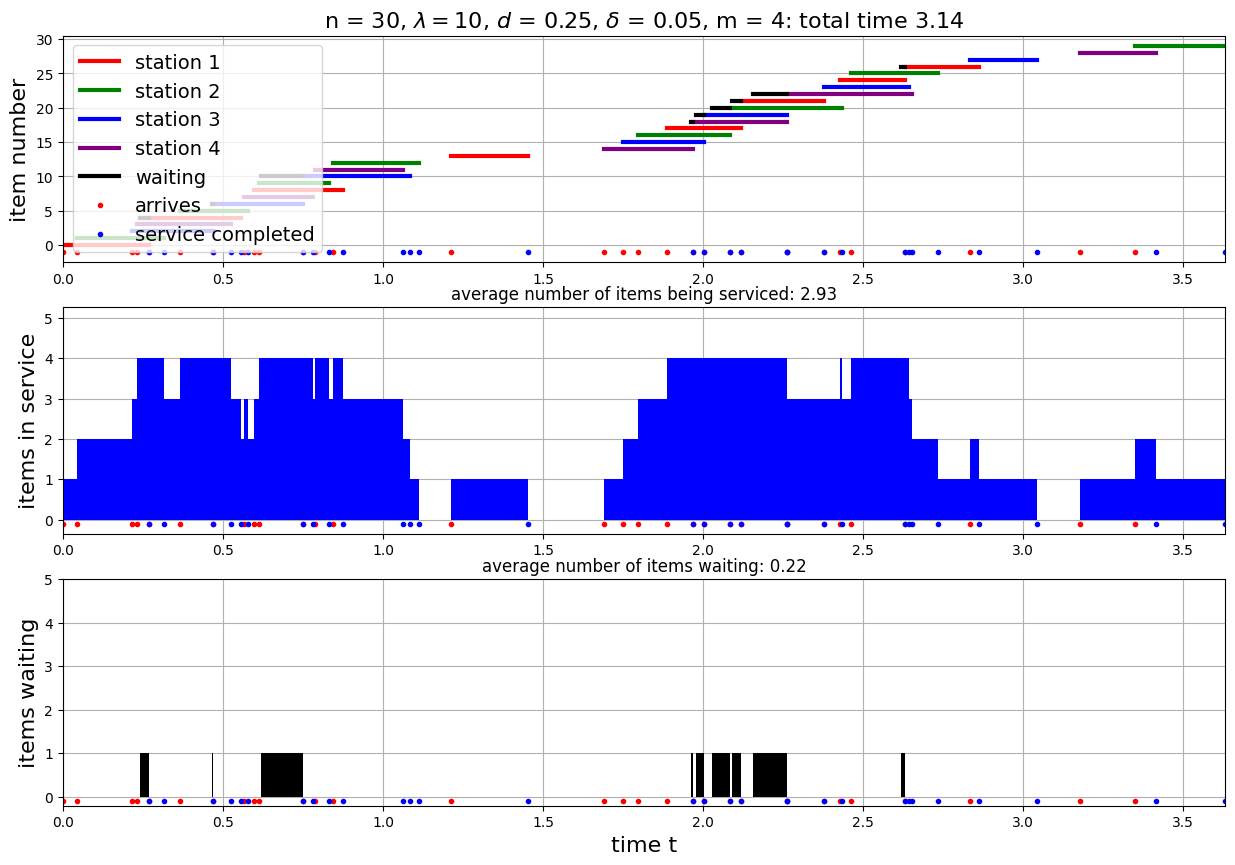

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 30 #number of items
la = 10 #average number of arrivals in unit time interval
m_station = 4

td = np.random.exponential(1 / la, n) #Exp(la)-distributed arrival time differences
#print(td)
#service times, uniformly distributed between d-delta ... d+delta
d=0.25
delta=d/5
m=d-delta
M=d+delta
ts=np.random.uniform(m,M,n)

ta=np.zeros(n) #arrival times
tsc=np.zeros(n) #service completed times

#aa=np.zeros(n) #arrival times
#bb=np.zeros(n) #service completed times
service_starting_time = np.zeros(n)

tsc[0]=ta[0]+ts[0]
"""
bb[0] = aa[0] + ts[0]

for k in range(n-1):
    aa[k+1]=aa[k]+td[k]
    bb[k+1]=bb[k+1]+ts[k+1]
"""


# station
station = np.zeros(m_station)
color = np.zeros(n) # at the index of k (1 -> n) what color it should be
cnt = 0 # count at what color is it

# waiting
waiting_start = np.zeros(n)
waiting_end = np.zeros(n)

color[0] = 1
color[1] = 2
color[2] = 3
color[3] = 4
total_time = 0
for k in range(n):
  total_time += td[k] + waiting_end[k] - waiting_start[k]
total_time = round(total_time, 2)

for k in range(0,3):
  ta[k + 1] = ta[k] + td[k]
  tsc[k + 1] = ta[k + 1] + ts[k + 1]
  station[k] = tsc[k]

station[3] = tsc[3]
# station
# 0 1 2 3


for k in range(3, n-1):
    ta[k + 1] = ta[k] + td[k]

    nk = np.argmin(station)

    if(station[nk] > ta[k + 1]):
      waiting_start[k + 1] = ta[k + 1]
      waiting_end[k + 1] = station[nk]
      ta[k + 1] = station[nk]

    color[k + 1] = nk + 1
    tsc[k + 1] = ta[k + 1] + ts[k+1] + waiting_end[k + 1] - waiting_start[k + 1]
    station[nk] = tsc[k + 1]

# number of items in service
tasc=np.hstack((ta,tsc)) #arrival and service completed times
asc=np.hstack((np.zeros(n),np.ones(n))) #0 = arrives, 1 = service completed
tascs=np.sort(tasc) #smallest->largest
ind=np.argsort(tasc) #corresponding indices
asct=asc[ind] #arrivals and service completions in time order
nis=np.zeros(2*n-1) #number of items in service between asct time-intervals
nisp=0 #previous number of items in service

sum = 0
for k in range(2*n-1):
    if asct[k]==0:
        nis[k]=nisp+1 #arrival
    else:
        nis[k]=nisp-1 #service completed
    nisp=nis[k]

for k in range(2*n-1):
  sum += nis[k]
sum = round(sum / 60, 2)

# ta la diem bat dau, tsc diem ket thuc, td random thoi gian bat dau, ts random thoi gian ket thuc
plt.figure(figsize=(15,10))
plt.subplot(311)

plt.plot([ta[0],tsc[0]],[0,0], 'r', label = 'station 1' ,lw=3)

plt.plot([ta[1],tsc[1]],[1,1],'g', label = 'station 2' ,lw=3)
plt.plot([ta[2],tsc[2]],[2,2],'b', label = 'station 3' ,lw=3)
plt.plot([ta[3],tsc[3]],[3,3],'purple', label = 'station 4'  ,lw=3)

ok = False
for k in range(4, n):
    if(color[k] == 1):
      plt.plot([ta[k],tsc[k]],[k,k],'r' ,lw=3)
    elif(color[k] == 2):
      plt.plot([ta[k],tsc[k]],[k,k],'g' ,lw=3)
    elif(color[k] == 3):
      plt.plot([ta[k],tsc[k]],[k,k],'b' ,lw=3)
    elif(color[k] == 4):
      plt.plot([ta[k],tsc[k]],[k,k],'purple' ,lw=3)

    if(waiting_start[k] != 0 and ok == False):
        ok = True
        plt.plot([waiting_start[k],waiting_end[k]],[k,k],'black', label = 'waiting' ,lw=3)
    if(ok == True):
      plt.plot([waiting_start[k],waiting_end[k]],[k,k],'black' ,lw=3)
# k is the hang ngang

plt.plot(ta,-np.ones(n),'r.',label='arrives')
plt.plot(tsc,-np.ones(n),'b.',label='service completed')


plt.xlim(0,tascs[-1])
plt.grid()
plt.legend(fontsize=14, loc = 'upper left')
plt.title('n = '+ str(n) + ', ' +'$\lambda = $'+str(la)+r', $d$ = '+str(d)
          +', $\delta$ = '
          +str(delta) + ', m = ' + str(m_station) + ': total time ' + str(total_time) ,fontsize=16)
plt.yticks(np.arange(0,n+1,5))
plt.ylabel('item number',fontsize=16)


plt.subplot(312)

plt.bar(tascs[:-1],nis,zorder=2,facecolor='b',
        align='edge', #tolppien vasen reuna tsps[:-1]:ssä
        width=tascs[1:]-tascs[:-1]) #tolppien leveydet


plt.plot(ta,-0.1+np.zeros(n),'r.',label='start')
plt.plot(tsc,-0.1+np.zeros(n),'b.',label='end')
plt.grid()
plt.title('average number of items being serviced: ' + str(sum))
plt.xlim(0,tascs[-1])
plt.yticks(np.arange(0,np.max(nis)+1,1))
plt.ylabel('items in service',fontsize=16)


ss=np.hstack((waiting_start,waiting_end)) #arrival and service completed times
uu=np.hstack((np.zeros(n),np.ones(n))) #0 = arrives, 1 = service completed
sss=np.sort(ss) #smallest->largest
dd=np.argsort(ss) #corresponding ddices
uuu=uu[dd] #arrivals and service completions in time order
zz=np.zeros(2*n-1) #number of items in service between asct time-intervals
z=0 #previous number of items in service

sum = 0
for k in range(2*n-1):
    if uuu[k]==0:
        zz[k]=z+1 #arrival
    else:
        zz[k]=z-1 #service completed
    z=zz[k]

for k in range(2*n-1):
  if(zz[k] < 0):
    zz[k] = 0
  sum += zz[k]

plt.subplot(313)

sum = round(sum / 60, 2)

plt.bar(sss[:-1],zz,zorder=2,facecolor='black',
        align='edge', #tolppien vasen reuna tsps[:-1]:ssä
        width=sss[1:]-sss[:-1]) #tolppien leveydet

plt.xlim(0,tascs[-1])
plt.plot(ta,-0.1+np.zeros(n),'r.',label='start')
plt.plot(tsc,-0.1+np.zeros(n),'b.',label='end')
plt.grid()
plt.title('average number of items waiting: ' + str(sum))
plt.yticks(np.arange(0,np.max(nis)+1,1))
plt.ylabel('items waiting',fontsize=16)
plt.xlabel('time t',fontsize=16)
plt.show()



Exercise 16:


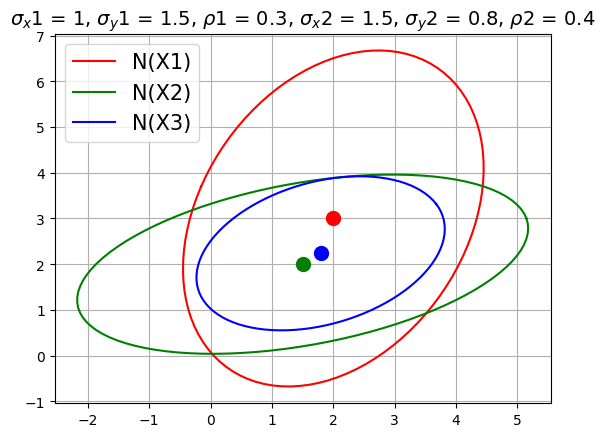

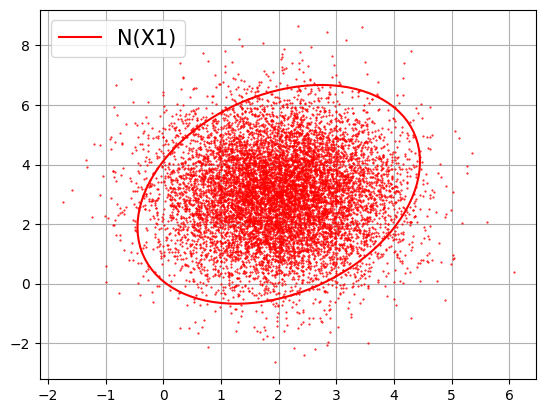

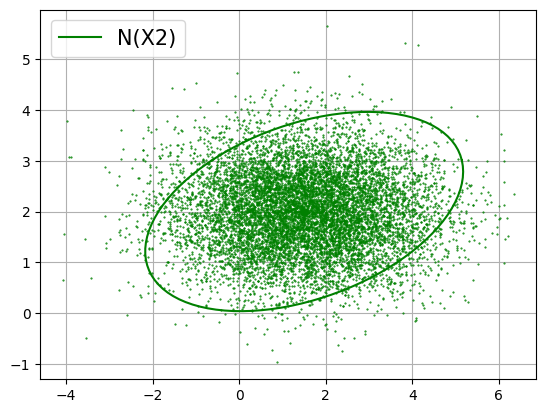

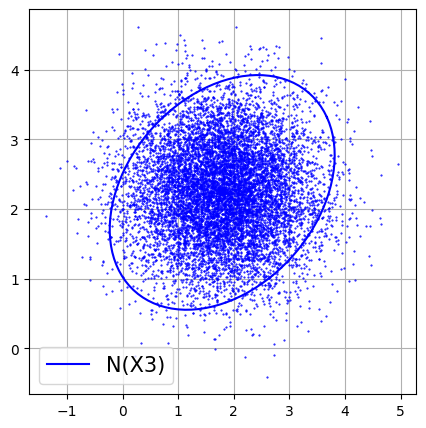

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# GIVEN

mu_x1 = 2
mu_y1 = 3
mu_1 = np.array([[mu_x1, mu_y1]]).T

mu_x2 = 1.5
mu_y2 = 2
mu_2 = np.array([[mu_x2, mu_y2]]).T

sigma_x1 = 1
sigma_y1 = 1.5

p_1 = 0.3
sigma_xy1 = p_1 * sigma_x1 * sigma_y1

sigma_x2 = 1.5
sigma_y2 = 0.8

p_2 = 0.4

sigma_xy2 = p_2 * sigma_x2 * sigma_y2

# Solve

def ellipse2D(mu, S, p):
    vals, vect = np.linalg.eig(S)
    la1 = vals[0]
    la2 = vals[1]
    u = vect[:,0]
    v = vect[:,1]
    a = np.sqrt(p*la1)
    b = np.sqrt(p*la2)
    t = np.linspace(0,2*np.pi,100)
    co = np.cos(t)
    si = np.sin(t)
    x = mu[0,0] + a * co * u[0] + b * si * v[0]
    y = mu[1,0] + a * co * u[1] + b * si * v[1]
    return x,y

S_1 = np.array([[sigma_x1 ** 2, sigma_xy1],
            [sigma_xy1, sigma_y1 ** 2]])

S_2 = np.array([[sigma_x2 ** 2, sigma_xy2],
            [sigma_xy2, sigma_y2 ** 2]])

A_1 = S_2@np.linalg.inv(S_1 + S_2)
A_2 = S_1@np.linalg.inv(S_1 + S_2)
mu_3 = A_1@mu_1 + A_2@mu_2
S_3 = S_2@np.linalg.inv(S_1 + S_2)@S_1
sigma_x3 = np.sqrt(S_3[0, 0])
sigma_y3 = np.sqrt(S_3[1, 1])

p = 6.0
x1,y1 = ellipse2D(mu_1, S_1, p)
x2,y2 = ellipse2D(mu_2, S_2, p)
x3,y3 = ellipse2D(mu_3, S_3, p)


plt.plot(x1, y1, 'r', label = 'N(X1)')
plt.plot(mu_x1, mu_y1, 'ro', markersize = 10)
plt.plot(x2,y2,'g',label = 'N(X2)')
plt.plot(mu_x2, mu_y2, 'go', markersize = 10)
plt.plot(x3, y3, 'b', label = 'N(X3)')
plt.plot(mu_3[0], mu_3[1], 'bo', markersize = 10)
plt.grid()
plt.legend(fontsize = 15)

plt.title('$\sigma_x1$ = '+str(sigma_x1)+', $\sigma_y1$ = '+str(sigma_y1)+ r', $\rho1$ = '+str(p_1)+
          ', $\sigma_x2$ = '+str(sigma_x2)+', $\sigma_y2$ = '+str(sigma_y2)+ r', $\rho2$ = '+str(p_2),fontsize=14)
plt.show()


N = 10000
x_1m = np.random.normal(mu_x1, sigma_x1, N)
y_1m = np.random.normal(mu_y1, sigma_y1, N)

plt.plot(x_1m, y_1m, 'r.', markersize = 1)
plt.plot(x1, y1, 'r', label='N(X1)')
plt.plot(mu_x1, mu_y1, 'ro', markersize = 5, label='')
plt.grid()
plt.legend(fontsize = 15)
plt.show()

N = 10000
x_2m = np.random.normal(mu_x2, sigma_x2, N)
y_2m = np.random.normal(mu_y2, sigma_y2, N)

plt.plot(x_2m, y_2m, 'g.', markersize = 1)
plt.plot(x2, y2, 'g', label='N(X2)')
plt.plot(mu_x2, mu_y2, 'go', markersize = 5, label='')
plt.grid()
plt.legend(fontsize = 15)
plt.show()


N = 10000
x_m = np.random.normal(mu_3[0], sigma_x3, N)
y_m = np.random.normal(mu_3[1], sigma_y3, N)

plt.figure(figsize = (5,5))
plt.plot(x_m, y_m, 'b.', markersize = 1)
plt.plot(x3, y3, 'b', label='N(X3)')
plt.plot(mu_3[0],mu_3[1],'bo',markersize = 5,label='')
plt.grid()
plt.legend(fontsize = 15)
plt.show()
